<a href="https://colab.research.google.com/github/idosakazi123/Stock-Regression-and-Correlation/blob/master/Algo_Trade_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Part 1 - Data Preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as ts
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plot
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten

from sklearn.model_selection import KFold
#Importing the sklearn linear models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 

Using TensorFlow backend.


##Get a csv file from drive

In [0]:
#Get access to google drive
#from google.colab import drive
#drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
#dataset_train = pd.read_csv("drive/My Drive/algoTrade_project/stock_regression.csv")

In [0]:
from google.colab import files
from pathlib import Path
raw_data_file = Path('/content/dATA-bEN.xlsx')
if not raw_data_file.exists():  
  files.upload()

In [0]:
raw_data = pd.read_excel('/content/dATA-bEN.xlsx')
raw_data.head()

,Filed,Start Day,End Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,PX_last,36526.0,43177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,MSCI World מניות גלובליות,NaN,USD/ils,NaN,eur/ils,NaN,eur/usd,NaN,SP500,NaN,Gold Usd,NaN,BIT USDc Coiun,NaN,"אגח ממשלת ארב""ה",NaN,"אג""ח חברות.",NaN
2,NaN,NaN,NaN,MXWO index,NaN,USDILS Curncy,NaN,EURILS Curncy,NaN,EURusd Curncy,NaN,spx index,NaN,XAUUSD Curncy,NaN,XBTUSD Curncy,NaN,USGG10YR index,NaN,LBUSTRUU Index,NaN
3,NaN,NaN,NaN,Date,Price_last,Date,Price_last,Date,Price_last,Date,Price_last,Date,Price_last,Date,Price_last,Date,Price_last,Date,Price_last,Date,Price_last
4,NaN,NaN,1.0,2000-01-03 00:00:00,1422.18,2000-01-03 00:00:00,4.1179,2000-01-03 00:00:00,4.1807,2000-01-03 00:00:00,1.0243,2000-01-03 00:00:00,1455.22,2000-01-03 00:00:00,289,2010-07-19 00:00:00,0.08,2000-01-03 00:00:00,6.592,2000-01-03 00:00:00,829.39


In [0]:
#create df that will be convenient to use

#pd.set_option('display.max_columns', 25)

#raw_data = pd.read_excel(r'drive/My Drive/algoTrade_project/dATA-bEN.xlsx')

dataset_train = raw_data.iloc[4:len(raw_data), 3:len(raw_data.columns)].copy()
dataset_train.columns = ['Date_MXWO_index', 'Price_last_MXWO_index', 'Date_USDILS_Curncy', 'Price_last_USDILS_Curncy', 'Date_EURILS_Curncy', 'Price_last_EURILS_Curncy', 'Date_EURusd_Curncy','Price_last_EURusd_Curncy', 'Date_spx_index', 'Price_last_spx_index', 'Date_XAUUSD_Curncy',	'Price_last_XAUUSD_Curncy','Date_XBTUSD_Curncy', 'Price_last_XBTUSD_Curncy', 'Date_USGG10YR_index', 'Price_last_USGG10YR_index', 'Date_LBUSTRUU_Index', 'Price_last_LBUSTRUU_Index']

for date in ['Date_MXWO_index', 'Date_USDILS_Curncy', 'Date_EURILS_Curncy', 'Date_EURusd_Curncy','Date_spx_index', 'Date_XAUUSD_Curncy', 'Date_XBTUSD_Curncy', 'Date_USGG10YR_index', 'Date_LBUSTRUU_Index']:
    dataset_train[date] = dataset_train[date].apply(lambda x: x.strftime('%d/%m/%Y') if not pd.isnull(x) else '')
#dataset_train.to_csv('stock_regression.csv', index=False)
dataset_train = dataset_train.reset_index(drop=True)

In [0]:
dataset_train.head(10)

,Date_MXWO_index,Price_last_MXWO_index,Date_USDILS_Curncy,Price_last_USDILS_Curncy,Date_EURILS_Curncy,Price_last_EURILS_Curncy,Date_EURusd_Curncy,Price_last_EURusd_Curncy,Date_spx_index,Price_last_spx_index,Date_XAUUSD_Curncy,Price_last_XAUUSD_Curncy,Date_XBTUSD_Curncy,Price_last_XBTUSD_Curncy,Date_USGG10YR_index,Price_last_USGG10YR_index,Date_LBUSTRUU_Index,Price_last_LBUSTRUU_Index
0,03/01/2000,1422.18,03/01/2000,4.1179,03/01/2000,4.1807,03/01/2000,1.0243,03/01/2000,1455.22,03/01/2000,289,19/07/2010,0.08,03/01/2000,6.592,03/01/2000,829.39
1,04/01/2000,1378.31,04/01/2000,4.115,04/01/2000,4.2687,04/01/2000,1.0296,04/01/2000,1399.42,04/01/2000,282.25,20/07/2010,0.07,04/01/2000,6.497,04/01/2000,832.53
2,05/01/2000,1359.54,05/01/2000,4.1512,05/01/2000,4.2956,05/01/2000,1.0321,05/01/2000,1402.11,05/01/2000,280,21/07/2010,0.08,05/01/2000,6.594,05/01/2000,828.84
3,06/01/2000,1344.06,06/01/2000,4.1562,06/01/2000,4.3013,06/01/2000,1.0328,06/01/2000,1403.45,06/01/2000,281.1,22/07/2010,0.05,06/01/2000,6.524,06/01/2000,831.02
4,07/01/2000,1375.88,07/01/2000,4.1695,07/01/2000,4.2646,07/01/2000,1.0295,07/01/2000,1441.47,07/01/2000,281.75,23/07/2010,0.06,07/01/2000,6.515,07/01/2000,833.27
5,10/01/2000,1391.11,10/01/2000,4.1249,10/01/2000,4.2217,10/01/2000,1.0256,10/01/2000,1457.6,10/01/2000,281.48,26/07/2010,0.06,10/01/2000,6.552,10/01/2000,831.98
6,11/01/2000,1386.34,11/01/2000,4.1181,11/01/2000,4.2325,11/01/2000,1.0336,11/01/2000,1438.56,11/01/2000,283.25,27/07/2010,0.06,11/01/2000,6.657,11/01/2000,828.11
7,12/01/2000,1377.98,12/01/2000,4.1224,12/01/2000,4.2347,12/01/2000,1.0309,12/01/2000,1432.25,12/01/2000,282.35,28/07/2010,0.06,12/01/2000,6.703,12/01/2000,827.04
8,13/01/2000,1390.3,13/01/2000,4.1153,13/01/2000,4.2271,13/01/2000,1.0258,13/01/2000,1449.68,13/01/2000,284.25,29/07/2010,0.07,13/01/2000,6.63,13/01/2000,830.78
9,14/01/2000,1402.14,14/01/2000,4.1158,14/01/2000,4.166,14/01/2000,1.0122,14/01/2000,1465.15,14/01/2000,284.2,30/07/2010,0.06,14/01/2000,6.679,14/01/2000,829.45


#Part 0 - Building The Dataset

##Create a unic date from the dataset_train

In [0]:
type(dataset_train[dataset_train.columns[0]])

pandas.core.series.Series

In [0]:
for i in range(0, len(dataset_train.columns), 2):
  dataset_train[dataset_train.columns[i]] = pd.to_datetime(dataset_train[dataset_train.columns[i]],dayfirst=True)

In [0]:
dataset_train.head(5)

,Date_MXWO_index,Price_last_MXWO_index,Date_USDILS_Curncy,Price_last_USDILS_Curncy,Date_EURILS_Curncy,Price_last_EURILS_Curncy,Date_EURusd_Curncy,Price_last_EURusd_Curncy,Date_spx_index,Price_last_spx_index,Date_XAUUSD_Curncy,Price_last_XAUUSD_Curncy,Date_XBTUSD_Curncy,Price_last_XBTUSD_Curncy,Date_USGG10YR_index,Price_last_USGG10YR_index,Date_LBUSTRUU_Index,Price_last_LBUSTRUU_Index
0,2000-01-03,1422.18,2000-01-03,4.1179,2000-01-03,4.1807,2000-01-03,1.0243,2000-01-03,1455.22,2000-01-03,289,2010-07-19,0.08,2000-01-03,6.592,2000-01-03,829.39
1,2000-01-04,1378.31,2000-01-04,4.115,2000-01-04,4.2687,2000-01-04,1.0296,2000-01-04,1399.42,2000-01-04,282.25,2010-07-20,0.07,2000-01-04,6.497,2000-01-04,832.53
2,2000-01-05,1359.54,2000-01-05,4.1512,2000-01-05,4.2956,2000-01-05,1.0321,2000-01-05,1402.11,2000-01-05,280,2010-07-21,0.08,2000-01-05,6.594,2000-01-05,828.84
3,2000-01-06,1344.06,2000-01-06,4.1562,2000-01-06,4.3013,2000-01-06,1.0328,2000-01-06,1403.45,2000-01-06,281.1,2010-07-22,0.05,2000-01-06,6.524,2000-01-06,831.02
4,2000-01-07,1375.88,2000-01-07,4.1695,2000-01-07,4.2646,2000-01-07,1.0295,2000-01-07,1441.47,2000-01-07,281.75,2010-07-23,0.06,2000-01-07,6.515,2000-01-07,833.27


In [0]:
nameStocks = []
nameDate = []

for i in range(1, len(dataset_train.columns), 2):
  nameStocks.append(dataset_train.columns[i])

  
for i in range(0, len(dataset_train.columns), 2):
  nameDate.append(dataset_train.columns[i])

In [0]:
nameDate

['Date_MXWO_index',
 'Date_USDILS_Curncy',
 'Date_EURILS_Curncy',
 'Date_EURusd_Curncy',
 'Date_spx_index',
 'Date_XAUUSD_Curncy',
 'Date_XBTUSD_Curncy',
 'Date_USGG10YR_index',
 'Date_LBUSTRUU_Index']

In [0]:
nameStocks

['Price_last_MXWO_index',
 'Price_last_USDILS_Curncy',
 'Price_last_EURILS_Curncy',
 'Price_last_EURusd_Curncy',
 'Price_last_spx_index',
 'Price_last_XAUUSD_Curncy',
 'Price_last_XBTUSD_Curncy',
 'Price_last_USGG10YR_index',
 'Price_last_LBUSTRUU_Index']

In [0]:
date_dataset_train = []  
for i in range(0, len(dataset_train.columns), 2):
  date_dataset_train.extend(dataset_train[dataset_train.columns[i]].dropna().tolist())

In [0]:
len(date_dataset_train)

39618

In [0]:
unic_date_of_stocks = set(date_dataset_train)
unic_date_of_stocks = list(unic_date_of_stocks)
unic_date_of_stocks.sort()
print(len(unic_date_of_stocks))

4750


##Create a unic date data frame and normalized the data using MinMaxScaler using scaller_dic  for every stock price
 

In [0]:
data_list = []

for timeDate in unic_date_of_stocks:
  tempDict = {}
  for stock,dateName in zip(nameStocks,nameDate):
    tempDict['Date'] = timeDate
    stockPrice = dataset_train.loc[dataset_train[dateName] == timeDate][stock].values
    tempDict[stock] = stockPrice[0] if len(stockPrice)>0 else None
  data_list.append(tempDict)

In [0]:
data_list

[{'Date': Timestamp('2000-01-03 00:00:00'),
  'Price_last_EURILS_Curncy': 4.1807,
  'Price_last_EURusd_Curncy': 1.0243,
  'Price_last_LBUSTRUU_Index': 829.39,
  'Price_last_MXWO_index': 1422.18,
  'Price_last_USDILS_Curncy': 4.1179,
  'Price_last_USGG10YR_index': 6.592,
  'Price_last_XAUUSD_Curncy': 289,
  'Price_last_XBTUSD_Curncy': None,
  'Price_last_spx_index': 1455.22},
 {'Date': Timestamp('2000-01-04 00:00:00'),
  'Price_last_EURILS_Curncy': 4.2687,
  'Price_last_EURusd_Curncy': 1.0296,
  'Price_last_LBUSTRUU_Index': 832.53,
  'Price_last_MXWO_index': 1378.31,
  'Price_last_USDILS_Curncy': 4.115,
  'Price_last_USGG10YR_index': 6.497,
  'Price_last_XAUUSD_Curncy': 282.25,
  'Price_last_XBTUSD_Curncy': None,
  'Price_last_spx_index': 1399.42},
 {'Date': Timestamp('2000-01-05 00:00:00'),
  'Price_last_EURILS_Curncy': 4.2956,
  'Price_last_EURusd_Curncy': 1.0321,
  'Price_last_LBUSTRUU_Index': 828.84,
  'Price_last_MXWO_index': 1359.54,
  'Price_last_USDILS_Curncy': 4.1512,
  'Price_

In [0]:
new_dataset_train = pd.DataFrame(data_list)
new_dataset_train.head(10)

,Date,Price_last_EURILS_Curncy,Price_last_EURusd_Curncy,Price_last_LBUSTRUU_Index,Price_last_MXWO_index,Price_last_USDILS_Curncy,Price_last_USGG10YR_index,Price_last_XAUUSD_Curncy,Price_last_XBTUSD_Curncy,Price_last_spx_index
0,2000-01-03,4.1807,1.0243,829.39,1422.18,4.1179,6.592,289.00,NaN,1455.22
1,2000-01-04,4.2687,1.0296,832.53,1378.31,4.1150,6.497,282.25,NaN,1399.42
2,2000-01-05,4.2956,1.0321,828.84,1359.54,4.1512,6.594,280.00,NaN,1402.11
3,2000-01-06,4.3013,1.0328,831.02,1344.06,4.1562,6.524,281.10,NaN,1403.45
4,2000-01-07,4.2646,1.0295,833.27,1375.88,4.1695,6.515,281.75,NaN,1441.47
5,2000-01-10,4.2217,1.0256,831.98,1391.11,4.1249,6.552,281.48,NaN,1457.60
6,2000-01-11,4.2325,1.0336,828.11,1386.34,4.1181,6.657,283.25,NaN,1438.56
7,2000-01-12,4.2347,1.0309,827.04,1377.98,4.1224,6.703,282.35,NaN,1432.25
8,2000-01-13,4.2271,1.0258,830.78,1390.30,4.1153,6.630,284.25,NaN,1449.68
9,2000-01-14,4.1660,1.0122,829.45,1402.14,4.1158,6.679,284.20,NaN,1465.15


In [0]:
normelize_data = new_dataset_train.copy()

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaller_dic = {}
for name in nameStocks:
  scaller_dic[name] = MinMaxScaler(feature_range = (0, 1))
  #print(normelize_data[name].values.reshape(1,-1))
  normelize_data[name].fillna(0, inplace=True)
  #print(scaller_dic[name].fit_transform(normelize_data[name].values.reshape(-1,1)))
  normelize_data[name] = scaller_dic[name].fit_transform(normelize_data[name].values.reshape(-1,1)).reshape(-1)

In [0]:
print(scaller_dic['Price_last_EURILS_Curncy'].inverse_transform(normelize_data['Price_last_EURILS_Curncy'].values.reshape(-1,1)))

[[4.1807]
 [4.2687]
 [4.2956]
 ...
 [4.2495]
 [4.2479]
 [4.2478]]


In [0]:
normelize_data.head()

,Date,Price_last_EURILS_Curncy,Price_last_EURusd_Curncy,Price_last_LBUSTRUU_Index,Price_last_MXWO_index,Price_last_USDILS_Curncy,Price_last_USGG10YR_index,Price_last_XAUUSD_Curncy,Price_last_XBTUSD_Curncy,Price_last_spx_index
0,2000-01-03,0.297959,0.255344,0.403704,0.470131,0.821936,0.971126,0.152089,0.0,0.506539
1,2000-01-04,0.332975,0.262210,0.405233,0.442014,0.821357,0.957130,0.148537,0.0,0.487116
2,2000-01-05,0.343679,0.265449,0.403436,0.429984,0.828583,0.971420,0.147353,0.0,0.488052
3,2000-01-06,0.345947,0.266356,0.404498,0.420063,0.829581,0.961108,0.147932,0.0,0.488518
4,2000-01-07,0.331344,0.262081,0.405593,0.440457,0.832236,0.959782,0.148274,0.0,0.501753


In [0]:
normelize_data.isnull().sum()

Date                         0
Price_last_EURILS_Curncy     0
Price_last_EURusd_Curncy     0
Price_last_LBUSTRUU_Index    0
Price_last_MXWO_index        0
Price_last_USDILS_Curncy     0
Price_last_USGG10YR_index    0
Price_last_XAUUSD_Curncy     0
Price_last_XBTUSD_Curncy     0
Price_last_spx_index         0
dtype: int64

#Part 1 - Data Cleaning

##Create a new dataframe so that in each seven rows have a different stock.

##And in each raw we have the price of ten days of the stocks.

##Then we add a column of the class  'gold' stock  and adding the mean of the ten days after in each 7 rows




In [0]:
namePriceStock = []
for i in normelize_data.columns:
  namePriceStock.append(i)
  
namePriceStock.remove('Date')
namePriceStock.remove('Price_last_XAUUSD_Curncy')
namePriceStock.remove('Price_last_XBTUSD_Curncy') #for now because there is no data until 2010
class_name = 'Price_last_XAUUSD_Curncy'

In [0]:
namePriceStock

['Price_last_EURILS_Curncy',
 'Price_last_EURusd_Curncy',
 'Price_last_LBUSTRUU_Index',
 'Price_last_MXWO_index',
 'Price_last_USDILS_Curncy',
 'Price_last_USGG10YR_index',
 'Price_last_spx_index']

In [0]:

'''

#Create an array and put a dic of all the 10 days in each stock and do a mean in the 10 days after in the class (gold - "Price_last_XAUUSD_Curncy")
days_to_array = []
days = 30

for raw in range(0, len(normelize_data)-days, 1):
  df_days = normelize_data.iloc[raw:raw+days,:]
  
  for name in namePriceStock:
    tempDict = {}
    tempDict['Dates'] = (df_days.iloc[0]['Date'].date().strftime('%d/%m/%Y')) + '-' + (df_days.iloc[29]['Date'].date().strftime('%d/%m/%Y'))
    tempDict[name] = 1
    for otherNameStocks in namePriceStock:
        if(not (name is otherNameStocks)):
          tempDict[otherNameStocks] = 0
    for day in range(days):
      price = df_days[name].values[day]
      #price = sc.fit_transform([price])
      tempDict[f'day{day}'] = price
      
    mean_class = normelize_data.loc[raw+30:raw+59,class_name].mean()
    tempDict['gold'] = mean_class
    days_to_array.append(tempDict)
'''

'\n\n#Create an array and put a dic of all the 10 days in each stock and do a mean in the 10 days after in the class (gold - "Price_last_XAUUSD_Curncy")\ndays_to_array = []\ndays = 30\n\nfor raw in range(0, len(normelize_data)-days, 1):\n  df_days = normelize_data.iloc[raw:raw+days,:]\n  \n  for name in namePriceStock:\n    tempDict = {}\n    tempDict[\'Dates\'] = (df_days.iloc[0][\'Date\'].date().strftime(\'%d/%m/%Y\')) + \'-\' + (df_days.iloc[29][\'Date\'].date().strftime(\'%d/%m/%Y\'))\n    tempDict[name] = 1\n    for otherNameStocks in namePriceStock:\n        if(not (name is otherNameStocks)):\n          tempDict[otherNameStocks] = 0\n    for day in range(days):\n      price = df_days[name].values[day]\n      #price = sc.fit_transform([price])\n      tempDict[f\'day{day}\'] = price\n      \n    mean_class = normelize_data.loc[raw+30:raw+59,class_name].mean()\n    tempDict[\'gold\'] = mean_class\n    days_to_array.append(tempDict)\n'

In [0]:
#Create an array and put a dic of all the 10 days in each stock and do a mean in the 10 days after in the class (gold - "Price_last_XAUUSD_Curncy")

days_to_array = []
days = 10

for raw in range(0, len(normelize_data)-days, 1):
  df_days = normelize_data.iloc[raw:raw+days,:]
  
  for name in namePriceStock:
    tempDict = {}
    tempDict['Dates'] = (df_days.iloc[0]['Date'].date().strftime('%d/%m/%Y')) + '-' + (df_days.iloc[9]['Date'].date().strftime('%d/%m/%Y'))
    tempDict[name] = 1
    for otherNameStocks in namePriceStock:
        if(not (name is otherNameStocks)):
          tempDict[otherNameStocks] = 0
    for day in range(days):
      price = df_days[name].values[day]
      #price = sc.fit_transform([price])
      tempDict[f'day{day}'] = price
      
    mean_class = normelize_data.loc[raw+10:raw+19,class_name].mean()
    tempDict['gold'] = mean_class
    days_to_array.append(tempDict) 


In [0]:
'''
#Create an array and put a dic of all the 5 days in each stock and do a mean in the 5 days after in the class (gold - "Price_last_XAUUSD_Curncy")

days_to_array = []
days = 5

for raw in range(0, len(normelize_data)-days, 1):
  df_days = normelize_data.iloc[raw:raw+days,:]
  
  for name in namePriceStock:
    tempDict = {}
    tempDict['Dates'] = (df_days.iloc[0]['Date'].date().strftime('%d/%m/%Y')) + '-' + (df_days.iloc[4]['Date'].date().strftime('%d/%m/%Y'))
    tempDict[name] = 1
    for otherNameStocks in namePriceStock:
        if(not (name is otherNameStocks)):
          tempDict[otherNameStocks] = 0
    for day in range(days):
      price = df_days[name].values[day]
      #price = sc.fit_transform([price])
      tempDict[f'day{day}'] = price
      
    mean_class = normelize_data.loc[raw+5:raw+9,class_name].mean()
    tempDict['gold'] = mean_class
    days_to_array.append(tempDict) 
'''

'\n#Create an array and put a dic of all the 5 days in each stock and do a mean in the 5 days after in the class (gold - "Price_last_XAUUSD_Curncy")\n\ndays_to_array = []\ndays = 5\n\nfor raw in range(0, len(normelize_data)-days, 1):\n  df_days = normelize_data.iloc[raw:raw+days,:]\n  \n  for name in namePriceStock:\n    tempDict = {}\n    tempDict[\'Dates\'] = (df_days.iloc[0][\'Date\'].date().strftime(\'%d/%m/%Y\')) + \'-\' + (df_days.iloc[4][\'Date\'].date().strftime(\'%d/%m/%Y\'))\n    tempDict[name] = 1\n    for otherNameStocks in namePriceStock:\n        if(not (name is otherNameStocks)):\n          tempDict[otherNameStocks] = 0\n    for day in range(days):\n      price = df_days[name].values[day]\n      #price = sc.fit_transform([price])\n      tempDict[f\'day{day}\'] = price\n      \n    mean_class = normelize_data.loc[raw+5:raw+9,class_name].mean()\n    tempDict[\'gold\'] = mean_class\n    days_to_array.append(tempDict) \n'

In [0]:
'''
#Create an array and put a dic of all the 5 days in each stock and do a mean in the 5 days after in the class (gold - "Price_last_XAUUSD_Curncy")

days_to_array = []
days = 5

for raw in range(0, len(new_dataset_train)-days, days):
  df_days = new_dataset_train.iloc[raw:raw+days,:]
  
  for name in namePriceStock:
    tempDict = {}
    tempDict['Dates'] = (df_days.iloc[0]['Date'].date().strftime('%d/%m/%Y')) + '-' + (df_days.iloc[4]['Date'].date().strftime('%d/%m/%Y'))
    tempDict[name] = 1
    for otherNameStocks in namePriceStock:
        if(not (name is otherNameStocks)):
          tempDict[otherNameStocks] = 0
    for day in range(days):
      price = df_days[name].values[day]
      tempDict[f'day{day}'] = price
      
    mean_class = new_dataset_train.loc[raw+5:raw+9,class_name].mean()
    tempDict['gold'] = mean_class
    days_to_array.append(tempDict) 
'''



'\n#Create an array and put a dic of all the 5 days in each stock and do a mean in the 5 days after in the class (gold - "Price_last_XAUUSD_Curncy")\n\ndays_to_array = []\ndays = 5\n\nfor raw in range(0, len(new_dataset_train)-days, days):\n  df_days = new_dataset_train.iloc[raw:raw+days,:]\n  \n  for name in namePriceStock:\n    tempDict = {}\n    tempDict[\'Dates\'] = (df_days.iloc[0][\'Date\'].date().strftime(\'%d/%m/%Y\')) + \'-\' + (df_days.iloc[4][\'Date\'].date().strftime(\'%d/%m/%Y\'))\n    tempDict[name] = 1\n    for otherNameStocks in namePriceStock:\n        if(not (name is otherNameStocks)):\n          tempDict[otherNameStocks] = 0\n    for day in range(days):\n      price = df_days[name].values[day]\n      tempDict[f\'day{day}\'] = price\n      \n    mean_class = new_dataset_train.loc[raw+5:raw+9,class_name].mean()\n    tempDict[\'gold\'] = mean_class\n    days_to_array.append(tempDict) \n'

In [0]:
#Make df like in the example in the phase 0

dvided_days = pd.DataFrame(days_to_array)
dvided_days.head(10)

,Dates,Price_last_EURILS_Curncy,Price_last_EURusd_Curncy,Price_last_LBUSTRUU_Index,Price_last_MXWO_index,Price_last_USDILS_Curncy,Price_last_USGG10YR_index,Price_last_spx_index,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,gold
0,03/01/2000-14/01/2000,1,0,0,0,0,0,0,0.297959,0.332975,0.343679,0.345947,0.331344,0.314273,0.318571,0.319446,0.316422,0.292109,0.151149
1,03/01/2000-14/01/2000,0,1,0,0,0,0,0,0.255344,0.262210,0.265449,0.266356,0.262081,0.257028,0.267392,0.263894,0.257287,0.239668,0.151149
2,03/01/2000-14/01/2000,0,0,1,0,0,0,0,0.403704,0.405233,0.403436,0.404498,0.405593,0.404965,0.403081,0.402560,0.404381,0.403733,0.151149
3,03/01/2000-14/01/2000,0,0,0,1,0,0,0,0.470131,0.442014,0.429984,0.420063,0.440457,0.450218,0.447160,0.441802,0.449698,0.457287,0.151149
4,03/01/2000-14/01/2000,0,0,0,0,1,0,0,0.821936,0.821357,0.828583,0.829581,0.832236,0.823333,0.821976,0.822834,0.821417,0.821517,0.151149
5,03/01/2000-14/01/2000,0,0,0,0,0,1,0,0.971126,0.957130,0.971420,0.961108,0.959782,0.965233,0.980701,0.987478,0.976724,0.983942,0.151149
6,03/01/2000-14/01/2000,0,0,0,0,0,0,1,0.506539,0.487116,0.488052,0.488518,0.501753,0.507367,0.500740,0.498543,0.504610,0.509995,0.151149
7,04/01/2000-17/01/2000,1,0,0,0,0,0,0,0.332975,0.343679,0.345947,0.331344,0.314273,0.318571,0.319446,0.316422,0.292109,0.274760,0.151044
8,04/01/2000-17/01/2000,0,1,0,0,0,0,0,0.262210,0.265449,0.266356,0.262081,0.257028,0.267392,0.263894,0.257287,0.239668,0.239668,0.151044
9,04/01/2000-17/01/2000,0,0,1,0,0,0,0,0.405233,0.403436,0.404498,0.405593,0.404965,0.403081,0.402560,0.404381,0.403733,0.000000,0.151044


##Fill mean value each raws that have NaN


In [0]:
#Check where we have Nan in the df

null_columns=dvided_days.columns[dvided_days.isnull().any()]
nan_in_dvided_days = dvided_days[null_columns].isnull().sum()

In [0]:
#Example of a day0 the raws that have NaN

dvided_days[dvided_days['day0'].isnull()][null_columns]

""


In [0]:
#Go over the df and fill in NaN mean value of the raw

for day,number_of_nan in zip(nan_in_dvided_days.keys(),nan_in_dvided_days.values):
  for index, row in dvided_days[dvided_days[day].isnull()][null_columns].iterrows():
    dvided_days.loc[index,nan_in_dvided_days.keys()] = dvided_days[dvided_days[day].isnull()][null_columns].mean(axis=1)[index]
    

In [0]:
dvided_days.head(22)

,Dates,Price_last_EURILS_Curncy,Price_last_EURusd_Curncy,Price_last_LBUSTRUU_Index,Price_last_MXWO_index,Price_last_USDILS_Curncy,Price_last_USGG10YR_index,Price_last_spx_index,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,gold
0,03/01/2000-14/01/2000,1,0,0,0,0,0,0,0.297959,0.332975,0.343679,0.345947,0.331344,0.314273,0.318571,0.319446,0.316422,0.292109,0.151149
1,03/01/2000-14/01/2000,0,1,0,0,0,0,0,0.255344,0.262210,0.265449,0.266356,0.262081,0.257028,0.267392,0.263894,0.257287,0.239668,0.151149
2,03/01/2000-14/01/2000,0,0,1,0,0,0,0,0.403704,0.405233,0.403436,0.404498,0.405593,0.404965,0.403081,0.402560,0.404381,0.403733,0.151149
3,03/01/2000-14/01/2000,0,0,0,1,0,0,0,0.470131,0.442014,0.429984,0.420063,0.440457,0.450218,0.447160,0.441802,0.449698,0.457287,0.151149
4,03/01/2000-14/01/2000,0,0,0,0,1,0,0,0.821936,0.821357,0.828583,0.829581,0.832236,0.823333,0.821976,0.822834,0.821417,0.821517,0.151149
5,03/01/2000-14/01/2000,0,0,0,0,0,1,0,0.971126,0.957130,0.971420,0.961108,0.959782,0.965233,0.980701,0.987478,0.976724,0.983942,0.151149
6,03/01/2000-14/01/2000,0,0,0,0,0,0,1,0.506539,0.487116,0.488052,0.488518,0.501753,0.507367,0.500740,0.498543,0.504610,0.509995,0.151149
7,04/01/2000-17/01/2000,1,0,0,0,0,0,0,0.332975,0.343679,0.345947,0.331344,0.314273,0.318571,0.319446,0.316422,0.292109,0.274760,0.151044
8,04/01/2000-17/01/2000,0,1,0,0,0,0,0,0.262210,0.265449,0.266356,0.262081,0.257028,0.267392,0.263894,0.257287,0.239668,0.239668,0.151044
9,04/01/2000-17/01/2000,0,0,1,0,0,0,0,0.405233,0.403436,0.404498,0.405593,0.404965,0.403081,0.402560,0.404381,0.403733,0.000000,0.151044


In [0]:
#check for NaN after fill mean in each raw

null_columns=dvided_days.columns[dvided_days.isnull().any()]
len(dvided_days[null_columns].isnull().sum())

0

#Part  2 - Feature Extraction 

##Add new features to the df such as weighted moving average and difference between days in percentage

In [0]:
dvided_days.isnull().sum()

Dates                        0
Price_last_EURILS_Curncy     0
Price_last_EURusd_Curncy     0
Price_last_LBUSTRUU_Index    0
Price_last_MXWO_index        0
Price_last_USDILS_Curncy     0
Price_last_USGG10YR_index    0
Price_last_spx_index         0
day0                         0
day1                         0
day2                         0
day3                         0
day4                         0
day5                         0
day6                         0
day7                         0
day8                         0
day9                         0
gold                         0
dtype: int64

In [0]:
dvided_days.loc[:, 'day0':'day9']

,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9
0,0.297959,0.332975,0.343679,0.345947,0.331344,0.314273,0.318571,0.319446,0.316422,0.292109
1,0.255344,0.262210,0.265449,0.266356,0.262081,0.257028,0.267392,0.263894,0.257287,0.239668
2,0.403704,0.405233,0.403436,0.404498,0.405593,0.404965,0.403081,0.402560,0.404381,0.403733
3,0.470131,0.442014,0.429984,0.420063,0.440457,0.450218,0.447160,0.441802,0.449698,0.457287
4,0.821936,0.821357,0.828583,0.829581,0.832236,0.823333,0.821976,0.822834,0.821417,0.821517
5,0.971126,0.957130,0.971420,0.961108,0.959782,0.965233,0.980701,0.987478,0.976724,0.983942
6,0.506539,0.487116,0.488052,0.488518,0.501753,0.507367,0.500740,0.498543,0.504610,0.509995
7,0.332975,0.343679,0.345947,0.331344,0.314273,0.318571,0.319446,0.316422,0.292109,0.274760
8,0.262210,0.265449,0.266356,0.262081,0.257028,0.267392,0.263894,0.257287,0.239668,0.239668
9,0.405233,0.403436,0.404498,0.405593,0.404965,0.403081,0.402560,0.404381,0.403733,0.000000


In [0]:

'''

#Add to df a 27 weight moving average for each 4 days ()
#Add difference between two days

for index, row in dvided_days.loc[:, 'day0':'day9'].iterrows():
  for i in range(27):
  #print(row[:].ewm(com=0.5).mean())
    dvided_days.loc[index,f'wma{i}'] = row[i]*0.1 + row[i+1]*0.2 +row[i+2]*0.3 + row[i+3]*0.4
  
  #for j in range(29):
    #dvided_days.loc[index,f'dailyDifference{j}'] = abs(row[j] - row[j+1]) / ((row[j] + row[j+1])/2)
    #dvided_days.loc[index,f'dailyDifference{j}'] = abs(row[j] - row[j+1])
'''

"\n\n#Add to df a 27 weight moving average for each 4 days ()\n#Add difference between two days\n\nfor index, row in dvided_days.loc[:, 'day0':'day9'].iterrows():\n  for i in range(27):\n  #print(row[:].ewm(com=0.5).mean())\n    dvided_days.loc[index,f'wma{i}'] = row[i]*0.1 + row[i+1]*0.2 +row[i+2]*0.3 + row[i+3]*0.4\n  \n  #for j in range(29):\n    #dvided_days.loc[index,f'dailyDifference{j}'] = abs(row[j] - row[j+1]) / ((row[j] + row[j+1])/2)\n    #dvided_days.loc[index,f'dailyDifference{j}'] = abs(row[j] - row[j+1])\n"

In [0]:
#Add to df a 6 weight moving average for each 5 days ()
#We try to add difference between two days but we didn't get better result so we gave it up.

for index, row in dvided_days.loc[:, 'day0':'day9'].iterrows():
  for i in range(6):
  #print(row[:].ewm(com=0.5).mean())
    dvided_days.loc[index,f'wma{i}'] = row[i]*0.1 + row[i+1]*0.1 +row[i+2]*0.15 + row[i+3]*0.25 + row[i+4]*0.4
  #for j in range(9):
    #dvided_days.loc[index,f'dailyDifference{j}'] = abs(row[j] - row[j+1]) / ((row[j] + row[j+1])/2)
    #dvided_days.loc[index,f'dailyDifference{j}'] = abs(row[j] - row[j+1])

In [0]:
'''
#Add to df a 3 weight moving average for each 3 days ()
#Add difference between two days

for index, row in dvided_days.loc[:, 'day0':'day9'].iterrows():
  for i in range(3):
  #print(row[:].ewm(com=0.5).mean())
    dvided_days.loc[index,f'wma{i}'] = row[i]*0.2 + row[i+1]*0.3 +row[i+2]*0.5
  for j in range(4):
    #dvided_days.loc[index,f'dailyDifference{j}'] = abs(row[j] - row[j+1]) / ((row[j] + row[j+1])/2)
    dvided_days.loc[index,f'dailyDifference{j}'] = abs(row[j] - row[j+1])
'''  
    

"\n#Add to df a 3 weight moving average for each 3 days ()\n#Add difference between two days\n\nfor index, row in dvided_days.loc[:, 'day0':'day9'].iterrows():\n  for i in range(3):\n  #print(row[:].ewm(com=0.5).mean())\n    dvided_days.loc[index,f'wma{i}'] = row[i]*0.2 + row[i+1]*0.3 +row[i+2]*0.5\n  for j in range(4):\n    #dvided_days.loc[index,f'dailyDifference{j}'] = abs(row[j] - row[j+1]) / ((row[j] + row[j+1])/2)\n    dvided_days.loc[index,f'dailyDifference{j}'] = abs(row[j] - row[j+1])\n"

In [0]:
dvided_days.isnull().sum()

Dates                        0
Price_last_EURILS_Curncy     0
Price_last_EURusd_Curncy     0
Price_last_LBUSTRUU_Index    0
Price_last_MXWO_index        0
Price_last_USDILS_Curncy     0
Price_last_USGG10YR_index    0
Price_last_spx_index         0
day0                         0
day1                         0
day2                         0
day3                         0
day4                         0
day5                         0
day6                         0
day7                         0
day8                         0
day9                         0
gold                         0
wma0                         0
wma1                         0
wma2                         0
wma3                         0
wma4                         0
wma5                         0
dtype: int64

In [0]:
dvided_days.head(10)

,Dates,Price_last_EURILS_Curncy,Price_last_EURusd_Curncy,Price_last_LBUSTRUU_Index,Price_last_MXWO_index,Price_last_USDILS_Curncy,Price_last_USGG10YR_index,Price_last_spx_index,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,gold,wma0,wma1,wma2,wma3,wma4,wma5
0,03/01/2000-14/01/2000,1,0,0,0,0,0,0,0.297959,0.332975,0.343679,0.345947,0.331344,0.314273,0.318571,0.319446,0.316422,0.292109,0.151149,0.333670,0.328103,0.324661,0.322291,0.318778,0.307151
1,03/01/2000-14/01/2000,0,1,0,0,0,0,0,0.255344,0.262210,0.265449,0.266356,0.262081,0.257028,0.267392,0.263894,0.257287,0.239668,0.151149,0.262994,0.261051,0.263706,0.263804,0.260908,0.252215
2,03/01/2000-14/01/2000,0,0,1,0,0,0,0,0.403704,0.405233,0.403436,0.404498,0.405593,0.404965,0.403081,0.402560,0.404381,0.403733,0.151149,0.404771,0.404926,0.404106,0.403548,0.403910,0.403777
3,03/01/2000-14/01/2000,0,0,0,1,0,0,0,0.470131,0.442014,0.429984,0.420063,0.440457,0.450218,0.447160,0.441802,0.449698,0.457287,0.151149,0.436910,0.440410,0.442492,0.442096,0.446471,0.451348
4,03/01/2000-14/01/2000,0,0,0,0,1,0,0,0.821936,0.821357,0.828583,0.829581,0.832236,0.823333,0.821976,0.822834,0.821417,0.821517,0.151149,0.828906,0.826823,0.825275,0.824309,0.823129,0.821917
5,03/01/2000-14/01/2000,0,0,0,0,0,1,0,0.971126,0.957130,0.971420,0.961108,0.959782,0.965233,0.980701,0.987478,0.976724,0.983942,0.151149,0.962728,0.963060,0.970809,0.977040,0.977166,0.980473
6,03/01/2000-14/01/2000,0,0,0,0,0,0,1,0.506539,0.487116,0.488052,0.488518,0.501753,0.507367,0.500740,0.498543,0.504610,0.509995,0.151149,0.495404,0.499180,0.500058,0.499734,0.502503,0.505743
7,04/01/2000-17/01/2000,1,0,0,0,0,0,0,0.332975,0.343679,0.345947,0.331344,0.314273,0.318571,0.319446,0.316422,0.292109,0.274760,0.151044,0.328103,0.324661,0.322291,0.318778,0.307151,0.294196
8,04/01/2000-17/01/2000,0,1,0,0,0,0,0,0.262210,0.265449,0.266356,0.262081,0.257028,0.267392,0.263894,0.257287,0.239668,0.239668,0.151044,0.261051,0.263706,0.263804,0.260908,0.252215,0.247506
9,04/01/2000-17/01/2000,0,0,1,0,0,0,0,0.405233,0.403436,0.404498,0.405593,0.404965,0.403081,0.402560,0.404381,0.403733,0.000000,0.151044,0.404926,0.404106,0.403548,0.403910,0.403777,0.242155


In [0]:
dvided_days_features = dvided_days.copy()

In [0]:
#dvided_days_features.to_csv('sss.csv')

In [0]:
dvided_days_features.head(20)

,Dates,Price_last_EURILS_Curncy,Price_last_EURusd_Curncy,Price_last_LBUSTRUU_Index,Price_last_MXWO_index,Price_last_USDILS_Curncy,Price_last_USGG10YR_index,Price_last_spx_index,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,gold,wma0,wma1,wma2,wma3,wma4,wma5
0,03/01/2000-14/01/2000,1,0,0,0,0,0,0,0.297959,0.332975,0.343679,0.345947,0.331344,0.314273,0.318571,0.319446,0.316422,0.292109,0.151149,0.333670,0.328103,0.324661,0.322291,0.318778,0.307151
1,03/01/2000-14/01/2000,0,1,0,0,0,0,0,0.255344,0.262210,0.265449,0.266356,0.262081,0.257028,0.267392,0.263894,0.257287,0.239668,0.151149,0.262994,0.261051,0.263706,0.263804,0.260908,0.252215
2,03/01/2000-14/01/2000,0,0,1,0,0,0,0,0.403704,0.405233,0.403436,0.404498,0.405593,0.404965,0.403081,0.402560,0.404381,0.403733,0.151149,0.404771,0.404926,0.404106,0.403548,0.403910,0.403777
3,03/01/2000-14/01/2000,0,0,0,1,0,0,0,0.470131,0.442014,0.429984,0.420063,0.440457,0.450218,0.447160,0.441802,0.449698,0.457287,0.151149,0.436910,0.440410,0.442492,0.442096,0.446471,0.451348
4,03/01/2000-14/01/2000,0,0,0,0,1,0,0,0.821936,0.821357,0.828583,0.829581,0.832236,0.823333,0.821976,0.822834,0.821417,0.821517,0.151149,0.828906,0.826823,0.825275,0.824309,0.823129,0.821917
5,03/01/2000-14/01/2000,0,0,0,0,0,1,0,0.971126,0.957130,0.971420,0.961108,0.959782,0.965233,0.980701,0.987478,0.976724,0.983942,0.151149,0.962728,0.963060,0.970809,0.977040,0.977166,0.980473
6,03/01/2000-14/01/2000,0,0,0,0,0,0,1,0.506539,0.487116,0.488052,0.488518,0.501753,0.507367,0.500740,0.498543,0.504610,0.509995,0.151149,0.495404,0.499180,0.500058,0.499734,0.502503,0.505743
7,04/01/2000-17/01/2000,1,0,0,0,0,0,0,0.332975,0.343679,0.345947,0.331344,0.314273,0.318571,0.319446,0.316422,0.292109,0.274760,0.151044,0.328103,0.324661,0.322291,0.318778,0.307151,0.294196
8,04/01/2000-17/01/2000,0,1,0,0,0,0,0,0.262210,0.265449,0.266356,0.262081,0.257028,0.267392,0.263894,0.257287,0.239668,0.239668,0.151044,0.261051,0.263706,0.263804,0.260908,0.252215,0.247506
9,04/01/2000-17/01/2000,0,0,1,0,0,0,0,0.405233,0.403436,0.404498,0.405593,0.404965,0.403081,0.402560,0.404381,0.403733,0.000000,0.151044,0.404926,0.404106,0.403548,0.403910,0.403777,0.242155


#Part 3 - Model Selection and Evaluation

## See the 'Gold' Stock in graph


In [0]:
y = dvided_days_features.loc[:,'gold']
del dvided_days_features['gold']
y = np.array(y)

In [0]:
y = np.take(y, list(range(0,len(y),7)))

In [0]:
x = dvided_days_features.loc[:,'day0':'wma5']
x = np.array(x)
#print(x.shape[0])
#print(x.shape[1])
x = np.reshape(x, (int(x.shape[0]/7), x.shape[1]*7))

In [0]:
data_predict = pd.DataFrame(new_dataset_train.loc[:len(y)-1,'Date'])
len(data_predict['Date'])

4740

In [0]:
data_predict['gold'] = y

In [0]:
data_predict['gold'] = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict['gold'].values.reshape(-1,1)).reshape(-1)

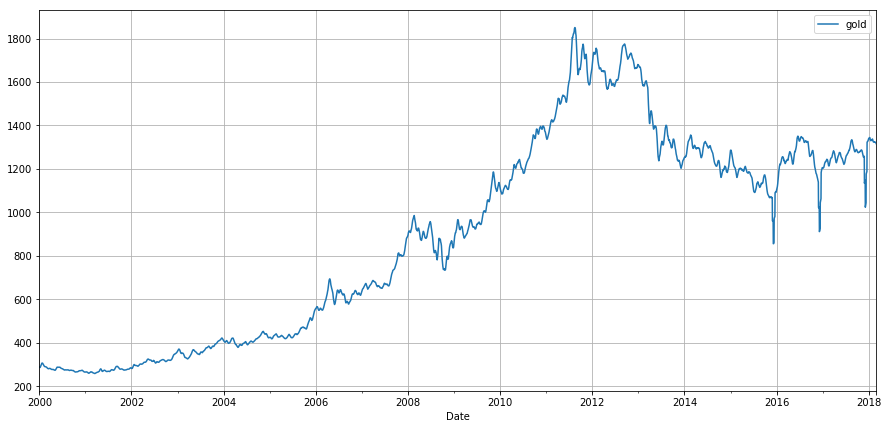

In [0]:
#Plot of the data set

data_predict.plot(x='Date', y = ['gold'],figsize=(15,7), grid=True )

##Using Stochastic Gradient Descent Regressor Model

In [0]:
scores = []
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
kfold = KFold(n_splits=10)
for train_index, test_index in kfold.split(x):
  
  X_train, X_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  clf.fit(X_train, y_train)
  yPredictionTest = clf.predict(X_test.reshape(len(X_test),-1))  
  
  print(mean_squared_error(y_test, yPredictionTest))
  scores.append(clf.score(X_test, y_test))
print(scores)

0.018087810027718535
0.00474525709390684
0.009287155533469557
0.009248882319082203
0.0159531031578909
0.0021286241642712134
0.041746426206992836
0.00972996073601668
0.00419753587266693
0.0065605559651960264
[-697.2946964907397, -22.211087869568075, -91.46121963846535, -4.47278989005973, -5.049386190417112, 0.6372857157449332, -8.372491275005034, -0.27146766930402455, -1.7685411392492127, -3.4875939103750486]


In [0]:
yPredictionTest = clf.predict(X_test.reshape(len(X_test),-1))

In [0]:
mse_SGDRegressor = "Stochastic Gradient Descent Regressor mse: " + str(mean_squared_error(y_test, yPredictionTest))
print("Stochastic Gradient Descent Regressor mse: " + str(mean_squared_error(y_test, yPredictionTest)))

Stochastic Gradient Descent Regressor mse: 0.0065605559651960264


In [0]:
data_predict_SGDRegressor = pd.DataFrame(data_predict)

In [0]:
data_predict_SGDRegressor['predict'] = np.nan
data_predict_SGDRegressor['predict'][test_index[0]:] = yPredictionTest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_predict_SGDRegressor['actual'] = np.nan
data_predict_SGDRegressor['actual'][test_index[0]:] = y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_predict_SGDRegressor['predict'][test_index[0]:]

4266    4.478203e+09
4267    4.478203e+09
4268    4.478203e+09
4269    4.478203e+09
4270    4.478203e+09
4271    4.478203e+09
4272    4.478203e+09
4273    4.591756e+09
4274    4.591756e+09
4275    4.591756e+09
4276    4.591756e+09
4277    4.591756e+09
4278    4.449719e+09
4279    4.449719e+09
4280    4.491753e+09
4281    4.449719e+09
4282    4.449719e+09
4283    4.449719e+09
4284    4.449719e+09
4285    4.449719e+09
4286    4.478203e+09
4287    4.478203e+09
4288    4.478203e+09
4289    4.478203e+09
4290    4.478203e+09
4291    4.449719e+09
4292    4.449719e+09
4293    4.449719e+09
4294    4.478203e+09
4295    4.478203e+09
            ...     
4710    4.697737e+09
4711    4.697737e+09
4712    4.697737e+09
4713    4.697737e+09
4714    4.697737e+09
4715    4.697737e+09
4716    4.697737e+09
4717    4.697737e+09
4718    4.697737e+09
4719    4.697737e+09
4720    4.697737e+09
4721    4.697737e+09
4722    4.697737e+09
4723    4.697737e+09
4724    4.697737e+09
4725    4.697737e+09
4726    4.599

In [0]:
data_predict_SGDRegressor['predict'] = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict_SGDRegressor['predict'].values.reshape(-1,1)).reshape(-1)
data_predict_SGDRegressor['actual'] = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict_SGDRegressor['actual'].values.reshape(-1,1)).reshape(-1)


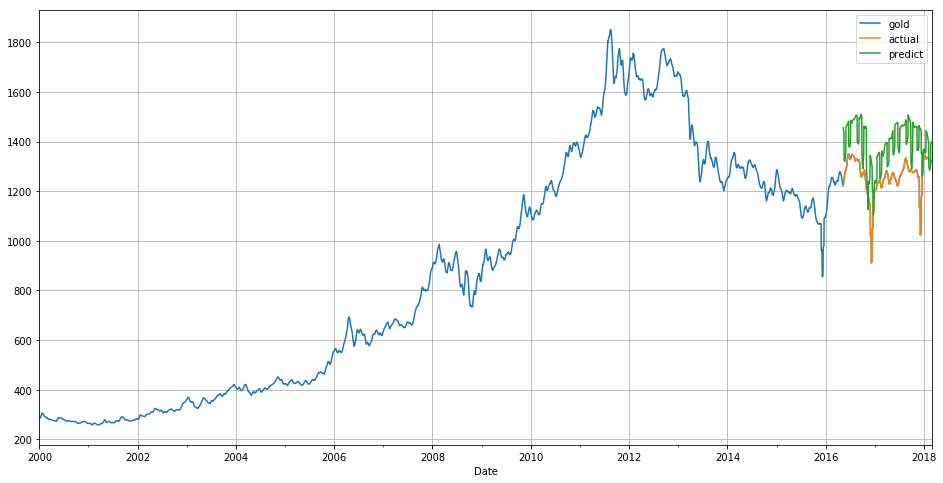

In [0]:
data_predict_SGDRegressor.plot(x='Date', y = ['gold',"actual", "predict"],figsize=(16,8), grid=True )

In [0]:
#plot just for the test set
'''
plt.figure(figsize=(16,8))
plt.plot(yPredictionTest , color = 'blue')
plt.plot(y_test, color = 'red')
'''

"\nplt.figure(figsize=(16,8))\nplt.plot(yPredictionTest , color = 'blue')\nplt.plot(y_test, color = 'red')\n"

##Using Linear Regression Model

In [0]:
model = LinearRegression()
scores = []
kfold = KFold(n_splits=10)
for train_index, test_index in kfold.split(x):
  
  X_train, X_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  model.fit(X_train, y_train)
  yPredictionTest = model.predict(X_test.reshape(len(X_test),-1))  
  
  print(mean_squared_error(y_test, yPredictionTest))
  scores.append(model.score(X_test, y_test))
print(scores)

0.0181895592200189
0.0025783505018253114
0.0009359921902425192
0.004296913988613051
0.01883964068101251
0.005848376421681746
0.03069899281553925
0.007641122228571611
0.012724634516939446
0.004226792068676852
[-701.2228072596321, -11.61181825812095, -8.318566828133061, -1.5425891068826267, -6.143955695651932, 0.003445651209743383, -5.892231705977447, 0.001492386822673164, -7.3927035314827805, -1.8912376402918214]


In [0]:
yPredictionTest = model.predict(X_test.reshape(len(X_test),-1))

In [0]:
mse_LinearRegression = "Linear Regression mse: " + str(mean_squared_error(y_test, yPredictionTest))
print("Linear Regression mse: " + str(mean_squared_error(y_test, yPredictionTest)))

Linear Regression mse: 0.004226792068676852


In [0]:
data_predict_LinearRegression = pd.DataFrame(data_predict)

In [0]:
data_predict_LinearRegression['predict'] = np.nan
data_predict_LinearRegression['predict'][test_index[0]:] = yPredictionTest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_predict_LinearRegression['actual'] = np.nan
data_predict_LinearRegression['actual'][test_index[0]:] = y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_predict_LinearRegression['predict'] = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict_LinearRegression['predict'] .values.reshape(-1,1)).reshape(-1)
data_predict_LinearRegression['actual'] = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict_LinearRegression['actual'].values.reshape(-1,1)).reshape(-1)


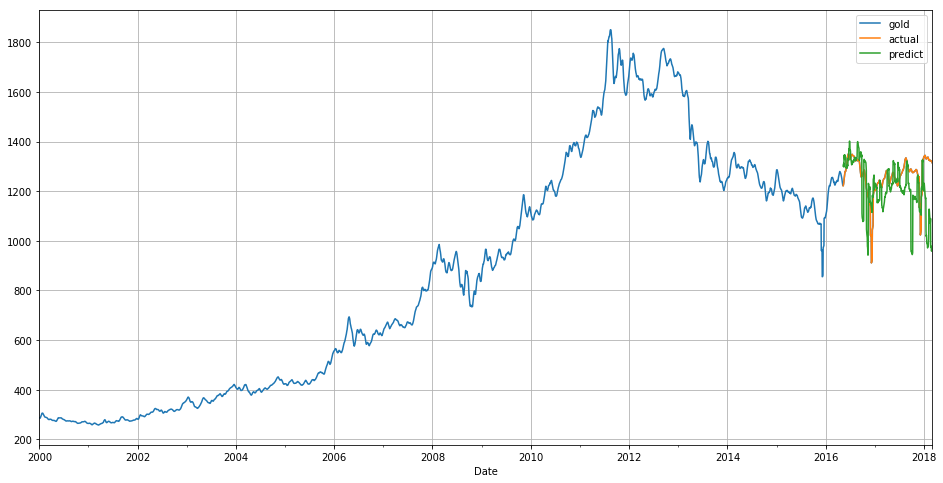

In [0]:
data_predict_LinearRegression.plot(x='Date', y = ['gold',"actual", "predict"],figsize=(16,8), grid=True )

In [0]:
#show the real values of the gold stock
'''
y_test_real = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(y_test.reshape(-1,1))

yTrainPrediction_real = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(yTrainPrediction.reshape(-1,1))
'''


"\ny_test_real = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(y_test.reshape(-1,1))\n\nyTrainPrediction_real = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(yTrainPrediction.reshape(-1,1))\n"

##Using Ridge Regression Model

In [0]:
ridge = Ridge(alpha=1.0)
scores = []
kfold = KFold(n_splits=10)
for train_index, test_index in kfold.split(x):
  
  X_train, X_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  ridge.fit(X_train, y_train)
  yPredictionTest = ridge.predict(X_test.reshape(len(X_test),-1))  
  
  print(mean_squared_error(y_test, yPredictionTest))
  scores.append(ridge.score(X_test, y_test))
print(scores)

0.016862761862867368
0.002687933690476993
0.001002262016636843
0.003895829355976982
0.018222922986154657
0.005243175692052723
0.03087615166196151
0.007035762388899718
0.01242536484864912
0.0039045391880680345
[-650.0007103669158, -12.147836638260497, -8.978337083036871, -1.3052575194733902, -5.910097525881768, 0.10657092487832974, -5.932005643371505, 0.08059809807069018, -7.195316203887454, -1.6708081412839981]


In [0]:
yPredictionTest = ridge.predict(X_test.reshape(len(X_test),-1))

In [0]:
mse_ridge = "Ridge Regression mse: " + str(mean_squared_error(y_test, yPredictionTest))
print("Ridge Regression mse: " + str(mean_squared_error(y_test, yPredictionTest)))

Ridge Regression mse: 0.0039045391880680345


In [0]:
data_predict_ridge = pd.DataFrame(data_predict)

In [0]:
data_predict_ridge['predict'] = np.nan
data_predict_ridge['predict'][test_index[0]:] = yPredictionTest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_predict_ridge['actual'] = np.nan
data_predict_ridge['actual'][test_index[0]:] = y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_predict_ridge['predict'] = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict_ridge['predict'] .values.reshape(-1,1)).reshape(-1)
data_predict_ridge['actual']  = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict_ridge['actual'] .values.reshape(-1,1)).reshape(-1)


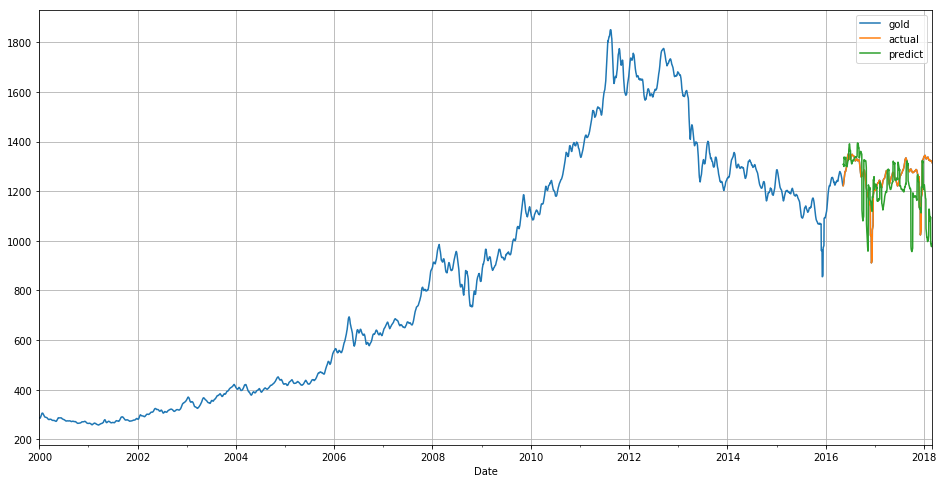

In [0]:
data_predict_ridge.plot(x='Date', y = ['gold',"actual", "predict"],figsize=(16,8), grid=True )

##Using Lasso Regression Model

In [0]:
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected

lasso = Lasso(alpha=0.01, max_iter=10e5)
scores = []
kfold = KFold(n_splits=10)
for train_index, test_index in kfold.split(x):
  
  X_train, X_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  lasso.fit(X_train, y_train)
  yPredictionTest = lasso.predict(X_test.reshape(len(X_test),-1))  
  
  print(mean_squared_error(y_test, yPredictionTest))
  scores.append(lasso.score(X_test, y_test))
print(scores)

0.004219511727770212
0.03810776020297598
0.03306243255610053
0.00654558208669459
0.0026266960182521775
0.008116336138485496
0.08382124351764465
0.023762342548980513
0.0029526464069565515
0.0019409042143384537
[-161.8977005379386, -185.40140103672752, -328.16352346362686, -2.873181021528342, 0.0039618961920460105, -0.3830111969306802, -17.818709645560045, -2.105156445916445, -0.9474575787536635, -0.32762985013668144]


In [0]:
yPredictionTest = lasso.predict(X_test.reshape(len(X_test),-1))

In [0]:
mse_lasso = "Lasso Regression mse: " + str(mean_squared_error(y_test, yPredictionTest))
print("Lasso Regression mse: " + str(mean_squared_error(y_test, yPredictionTest)))

Lasso Regression mse: 0.0019409042143384537


In [0]:
data_predict_lasso = pd.DataFrame(data_predict)

In [0]:
data_predict_lasso['predict'] = np.nan
data_predict_lasso['predict'][test_index[0]:] = yPredictionTest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_predict_lasso['actual'] = np.nan
data_predict_lasso['actual'][test_index[0]:] = y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_predict_lasso['predict'] = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict_lasso['predict'].values.reshape(-1,1)).reshape(-1)
data_predict_lasso['actual']  = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict_lasso['actual'].values.reshape(-1,1)).reshape(-1)


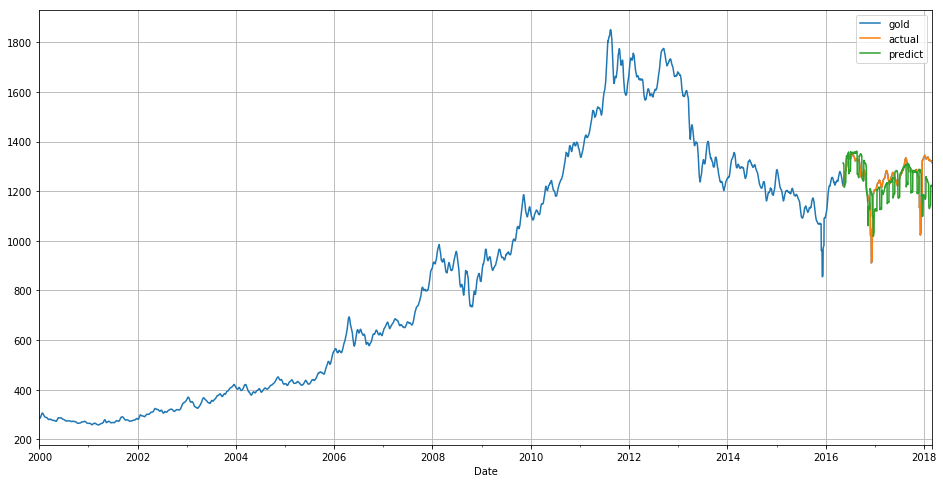

In [0]:
data_predict_lasso.plot(x='Date', y = ['gold',"actual", "predict"],figsize=(16,8), grid=True )

##Show The MSE Models

In [0]:
print(mse_SGDRegressor)
print(mse_LinearRegression)
print(mse_ridge)
print(mse_lasso)

Stochastic Gradient Descent Regressor mse: 0.0065605559651960264
Linear Regression mse: 0.004226792068676852
Ridge Regression mse: 0.0039045391880680345
Lasso Regression mse: 0.0019409042143384537


#Part 4 - Model Parameter Tuning

##Using Random Forest Regressor Model

### In random forest model we check the parameter max depth in Logarithmic range and get this resault

regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100) 
Random Forest Regressor mse: 0.0034790851536614354

regr = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=100) 
Random Forest Regressor mse: 0.0014247397610403147

regr = RandomForestRegressor(max_depth=8, random_state=0, n_estimators=100)
Random Forest Regressor mse: 0.0017595028505874586

regr = RandomForestRegressor(max_depth=16, random_state=0, n_estimators=100)
Random Forest Regressor mse: 0.0017987050067126578

As you can see we don't need to carry on since After max_depth is equal to 4 we dont get a better result so we stay in max_depth equal to 4

---

### In random forest model we check the parameter n_estimetor  and get this resault

regr = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=200  )
Random Forest Regressor mse: 0.0014339804927194384

regr = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=100  )
Random Forest Regressor mse: 0.0014247397610403147

regr = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=50  )
Random Forest Regressor mse: 0.0014428081161979992

As you can see 100 estimetors predict the lowest mse



In [0]:
scores = []
regr = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=100)
kfold = KFold(n_splits=10)
for train_index, test_index in kfold.split(x):
  
  X_train, X_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  regr.fit(X_train, y_train)
  yPredictionTest = regr.predict(X_test.reshape(len(X_test),-1))  
  
  print(mean_squared_error(y_test, yPredictionTest))
  scores.append(regr.score(X_test, y_test))
print(scores)

0.013248298522295142
0.0011367485188979855
0.0020980543687251813
0.0047842398883823295
0.03824352227280921
0.011079603294753994
0.023440360675061674
0.0031489077179391303
0.005920828250452868
0.0014247397610403147
[-510.46139756376476, -4.560324601089044, -19.887845056652043, -1.8309517614618693, -13.501870464970226, -0.8879473635322023, -4.262596008114969, 0.5885148495860633, -2.9051617632496645, 0.02544029661018543]


In [0]:
yPredictionTest = regr.predict(X_test.reshape(len(X_test),-1))

In [0]:
mse_RandomForestRegressor = "Random Forest Regressor mse: " + str(mean_squared_error(y_test, yPredictionTest))
print("Random Forest Regressor mse: " + str(mean_squared_error(y_test, yPredictionTest)))

Random Forest Regressor mse: 0.0014247397610403147


In [0]:
data_predict_RandomForestRegressor = pd.DataFrame(data_predict)

In [0]:
test_index[0]

4266

In [0]:
data_predict_RandomForestRegressor['predict'] = np.nan
data_predict_RandomForestRegressor['predict'][test_index[0]:] = yPredictionTest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_predict_RandomForestRegressor['actual'] = np.nan
data_predict_RandomForestRegressor['actual'][test_index[0]:] = y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_predict_RandomForestRegressor['predict'] = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict_RandomForestRegressor['predict'].values.reshape(-1,1)).reshape(-1)
data_predict_RandomForestRegressor['actual'] = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict_RandomForestRegressor['actual'].values.reshape(-1,1)).reshape(-1)


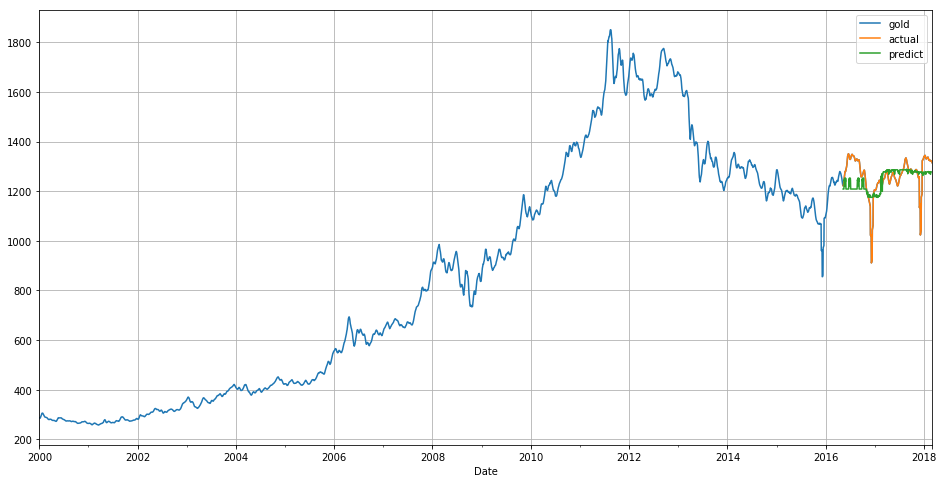

In [0]:
data_predict_RandomForestRegressor.plot(x ='Date', y = ['gold',"actual", "predict"],figsize=(16,8), grid=True )

##Using Decision Tree Regressor Model

### In Decision Tree model we check the parameter max depth in Logarithmic range and get this resault

1. dtRegr = DecisionTreeRegressor(criterion='mse', splitter='best',max_depth=2,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,random_state=0,max_leaf_nodes=None,presort=False)
                                
 Decision Tree Regressor mse: 0.0065624672158845114     
 

2. dtRegr = DecisionTreeRegressor(criterion='mse', splitter='best',max_depth=4,min_samples_split=4,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,random_state=0,max_leaf_nodes=None,presort=False)
                                
 Decision Tree Regressor mse: 0.002033357059305615

3. d1. dtRegr = DecisionTreeRegressor(criterion='mse', splitter='best',max_depth=8, min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,random_state=0,max_leaf_nodes=None,presort=False)

 Decision Tree Regressor mse: 0.0016555759433903633

4.  dtRegr = DecisionTreeRegressor(criterion='mse', splitter='best',max_depth=16,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,random_state=0,max_leaf_nodes=None,presort=False)

 Decision Tree Regressor mse: 0.0017992317206899854

As you can see we don't need to carry on since After max_depth is equal to 8 we dont get a better result so we stay in max_depth equal to 8

---

###In Decision Tree model we check the parameter min sample split

1.dtRegr = DecisionTreeRegressor(criterion='mse', splitter='best',max_depth=8, min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,random_state=0,max_leaf_nodes=None,presort=False)

Decision Tree Regressor mse: 0.0016555759433903633

2.dtRegr = DecisionTreeRegressor(criterion='mse', splitter='best',max_depth=8, min_samples_split=3,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,random_state=0,max_leaf_nodes=None,presort=False)

Decision Tree Regressor mse: 0.0017747279344015304

3.dtRegr = DecisionTreeRegressor(criterion='mse', splitter='best',max_depth=8, min_samples_split=4,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,random_state=0,max_leaf_nodes=None,presort=False)

Decision Tree Regressor mse: 0.0017900835426467685

As you can see we don't need to carry on since After min sample leaf was equal to 2, it gave the best mse scrore




In [0]:
scores = []
dtRegr = DecisionTreeRegressor(criterion='mse',
                                splitter='best',
                                max_depth=8,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0,
                                max_features=None,
                                random_state=0,
                                max_leaf_nodes=None,
                                presort=False)
kfold = KFold(n_splits=10)
for train_index, test_index in kfold.split(x):
  
  X_train, X_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  dtRegr.fit(X_train, y_train)
  yPredictionTest = dtRegr.predict(X_test.reshape(len(X_test),-1))  
  
  print(mean_squared_error(y_test, yPredictionTest))
  scores.append(dtRegr.score(X_test, y_test))
print(scores)

0.008058562343964262
0.0019610644489816437
0.004491487747973696
0.0039132552983887625
0.04041448259997686
0.02713216346332654
0.01892466364908588
0.00407469732520957
0.0026516294014503343
0.0016555759433903633
[-310.10738876109303, -8.592407395933744, -43.71642944626403, -1.315568875826059, -14.325094466791803, -3.6232789310936657, -3.2487767468763904, 0.46753681214498644, -0.7489177714385504, -0.13245776137511078]


In [0]:
yPredictionTest = dtRegr.predict(X_test.reshape(len(X_test),-1))

In [0]:
mse_DecisionTreeRegressor = "Decision Tree Regressor mse: " + str(mean_squared_error(y_test, yPredictionTest))
print("Decision Tree Regressor mse: " + str(mean_squared_error(y_test, yPredictionTest)))

Decision Tree Regressor mse: 0.0016555759433903633


In [0]:
data_predict_DecisionTreeRegressor = pd.DataFrame(data_predict)

In [0]:
test_index[0]

4266

In [0]:
data_predict_DecisionTreeRegressor['predict'] = np.nan
data_predict_DecisionTreeRegressor['predict'][test_index[0]:] = yPredictionTest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_predict_DecisionTreeRegressor['actual'] = np.nan
data_predict_DecisionTreeRegressor['actual'][test_index[0]:] = y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_predict_DecisionTreeRegressor['predict'] = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict_DecisionTreeRegressor['predict'].values.reshape(-1,1)).reshape(-1)
data_predict_DecisionTreeRegressor['actual'] = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict_DecisionTreeRegressor['actual'].values.reshape(-1,1)).reshape(-1)


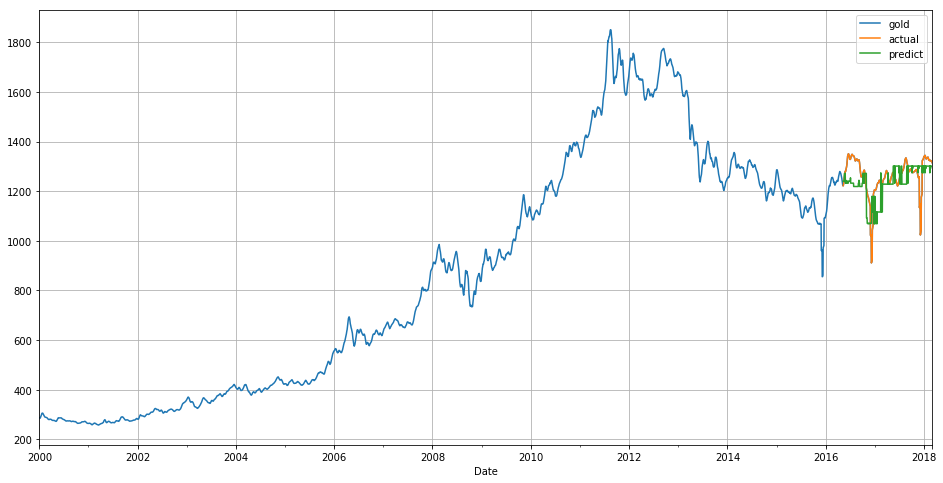

In [0]:
data_predict_DecisionTreeRegressor.plot(x ='Date', y = ['gold',"actual", "predict"],figsize=(16,8), grid=True )

##Show The MSE Models

In [0]:
print(mse_RandomForestRegressor)
print(mse_DecisionTreeRegressor)

Random Forest Regressor mse: 0.0014247397610403147
Decision Tree Regressor mse: 0.0016555759433903633


#Extra - Using Deep Learning Approach

In [0]:
scores = []
kfold = KFold(n_splits=10)
#x = np.reshape(x, (int(x.shape[0]/7), x.shape[1]*7,1))
for train_index, test_index in kfold.split(x):
  
  X_train, X_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

In [0]:
X_train = np.reshape(X_train, (int(X_train.shape[0]), X_train.shape[1],1))

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [0]:
X_train = np.reshape(X_train, (int(X_train.shape[0]), X_train.shape[1],1))
X_val = np.reshape(X_val, (int(X_val.shape[0]), X_val.shape[1],1))

In [0]:

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1,activation='sigmoid'))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.summary()
# Fitting the RNN to the Training set
lstm_history = regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 40, batch_size = 32 ,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 112, 100)          40800     
_________________________________________________________________
dropout_9 (Dropout)          (None, 112, 100)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 112, 50)           30200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 112, 50)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 112, 50)           20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 112, 50)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
__________

In [0]:
'''
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(Dense(20,activation='relu'))
regressor.add(Dense(1,activation='sigmoid'))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.summary()
# Fitting the RNN to the Training set
lstm_history = regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 30, batch_size = 32 ,verbose=1)
'''

"\n# Initialising the RNN\nregressor = Sequential()\n\n# Adding the first LSTM layer and some Dropout regularisation\nregressor.add(LSTM(units = 100, input_shape = (X_train.shape[1],1)))\nregressor.add(Dropout(0.2))\nregressor.add(Dense(20,activation='relu'))\nregressor.add(Dense(1,activation='sigmoid'))\n\n# Compiling the RNN\nregressor.compile(optimizer = 'adam', loss = 'mean_squared_error')\nregressor.summary()\n# Fitting the RNN to the Training set\nlstm_history = regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 30, batch_size = 32 ,verbose=1)\n"

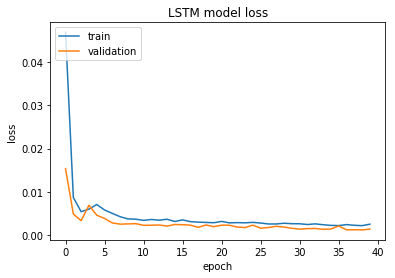

In [0]:
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [0]:
'''
plt.plot(lstm_history.history['acc'])
#plt.plot(lstm_history.history['val_acc'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
'''

"\nplt.plot(lstm_history.history['acc'])\n#plt.plot(lstm_history.history['val_acc'])\nplt.title('LSTM model accuracy')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\nplt.legend(['train', 'validation'], loc='upper left')\nplt.show()\n"

In [0]:
lstm_preds_train = regressor.predict(X_train)
lstm_pred_cat_train = np.argmax(lstm_preds_train,axis=1)

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
predicted_stock_price = regressor.predict(X_test)
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
real_stock_price = y_test

In [0]:
data_predict_lstm = pd.DataFrame(data_predict)

In [0]:
data_predict_lstm['predict'] = np.nan
data_predict_lstm['predict'][test_index[0]:] = predicted_stock_price.ravel()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_predict_lstm['actual'] = np.nan
data_predict_lstm['actual'][test_index[0]:] = y_test.ravel()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_predict_lstm['predict'] = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict_lstm['predict'].values.reshape(-1,1)).reshape(-1)
data_predict_lstm['actual'] = scaller_dic['Price_last_XAUUSD_Curncy'].inverse_transform(data_predict_lstm['actual'].values.reshape(-1,1)).reshape(-1)


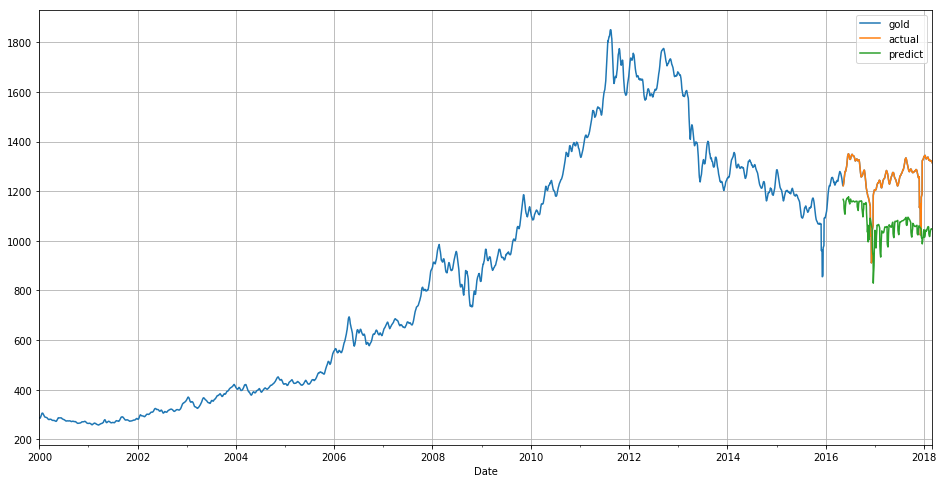

In [0]:
data_predict_lstm.plot(x ='Date', y = ['gold',"actual", "predict"],figsize=(16,8), grid=True )

##Show The MSE Models

In [0]:
print("Mean squared error: %.5f" % lstm_history.history['loss'][39])

Mean squared error: 0.00251
